# 1D domain wall

**Author**: Marijan Beg

**Date**: 26/02/2016

### Problem specification

The domain wall profile is computed in a one-dimenaional domain of $L=500 \,\text{nm}$ length.

Material paremeters of the simulated material are:

- exchange energy constant $A = 1.3 \times 10^{-11} \,\text{J/m}$,
- magnetisation saturation $M_\text{s} = 8.6 \times 10^{5} \,\text{A/m}$,
- anisotropy constant $K_{1} = 1.86 \times 10^{5} \,\text{J/m}^{3}$ with $(1, 0, 0)$ axis,
- anisotropy constant $K_{2} = -0.92 \times 10^{5} \,\text{J/m}^{3}$ with $(0, 0, 1)$ axis.

### Simulation

In [1]:
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import UniformExchange, UniaxialAnisotropy

Firstly, the mesh is created.

In [2]:
# Mesh dimensions.
L = 500  # diameter (nm)

# Mesh discretisation.
dx = dy = dz = 2  # nm

mesh = CuboidMesh(nx=int(L/dx), ny=1, nz=1, dx=dx, dy=dy, dz=dz, unit_length=1e-9)

The simulation object is created, parameters set, and energies added.

In [3]:
# PYTEST_VALIDATE_IGNORE_OUTPUT
Ms = 8.6e5  # magnetisation saturation (A/m)
A = 1.3e-11  # exchange energy constant (J/m)
K1 = 1.86e5  # anisotropy energy constant (J/m**3)
K2 = -0.92e5  # anisotropy energy constant (J/m**3)
alpha = 0.5  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ration (m/As)

# Create simulation object.
sim = Sim(mesh)

# Set simulation parameters.
sim.Ms = Ms
sim.alpha = alpha
sim.gamma = gamma

# Add energies.
sim.add(UniformExchange(A=A))
sim.add(UniaxialAnisotropy(K1, axis=(1,0,0)))
sim.add(UniaxialAnisotropy(K2, axis=(0,0,1)))
    
# Since the magnetisation dynamics is not important in this stage,
# the precession term in LLG equation can be set to artificially zero.
sim.do_precession = False

In order to obtain the domain wall as the relaxed state, the system must be appropriatelly initialised. In this case, the initial magnetisation is set to be in $(0, 0, 1)$ direction for $x < 0.4L \,\text{nm}$, in $(-1, 0, 0)$ direction for $0.4L \,\text{nm} < x < 0.6L \,\text{nm}$, and in $(0, 0, 1)$ direction for $x > 0.6L \,\text{nm}$.

In [4]:
def m_init(pos):
    x = pos[0]

    if x < 0.45*L:
        return (1,0,0)
    elif x > 0.55*L:
        return (-1,0,0) 
    else:
        return (0,1,0)

In the next step, the magnetisation is initialised, and the system is relaxed.

In [5]:
# Initialise the system.
sim.set_m(m_init)

# Relax the system to its equilibrium state.
sim.relax(dt=1e-13, stopping_dmdt=0.01, max_steps=5000, save_m_steps=None, save_vtk_steps=None)

step=1, time=1e-13, max_dmdt=2.97e+04 ode_step=0
step=2, time=2e-13, max_dmdt=2.79e+04 ode_step=2.13e-14
step=3, time=3e-13, max_dmdt=2.6e+04 ode_step=3.28e-14
step=4, time=4e-13, max_dmdt=2.41e+04 ode_step=3.28e-14
step=5, time=5e-13, max_dmdt=2.21e+04 ode_step=5.31e-14
step=6, time=6e-13, max_dmdt=2.02e+04 ode_step=5.31e-14
step=7, time=7e-13, max_dmdt=1.83e+04 ode_step=5.31e-14
step=8, time=8e-13, max_dmdt=1.66e+04 ode_step=5.31e-14
step=9, time=9e-13, max_dmdt=1.5e+04 ode_step=8.16e-14
step=10, time=1e-12, max_dmdt=1.36e+04 ode_step=8.16e-14
step=11, time=1.1e-12, max_dmdt=1.22e+04 ode_step=8.16e-14
step=12, time=1.2e-12, max_dmdt=1.1e+04 ode_step=8.16e-14
step=13, time=1.3e-12, max_dmdt=9.97e+03 ode_step=8.16e-14
step=14, time=1.4e-12, max_dmdt=9.01e+03 ode_step=8.16e-14
step=15, time=1.5e-12, max_dmdt=8.16e+03 ode_step=8.16e-14
step=16, time=1.6e-12, max_dmdt=7.4e+03 ode_step=8.16e-14
step=17, time=1.7e-12, max_dmdt=6.73e+03 ode_step=8.16e-14
step=18, time=1.8e-12, max_dmdt=6.44e

After the system is relaxed, the magnetisation profile can be plotted.

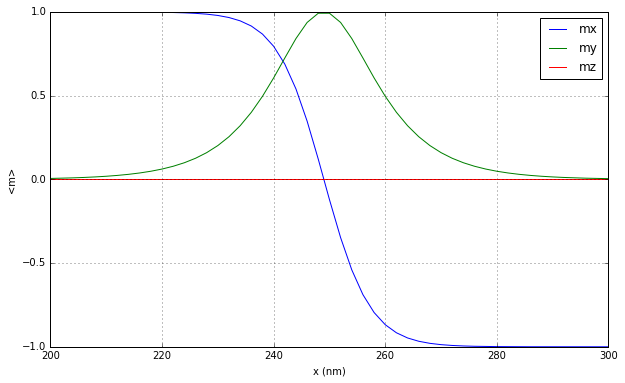

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = np.copy(sim.spin)

m.shape = (-1, 3)

mx = m[:, 0]
my = m[:, 1]
mz = m[:, 2]

x_array = np.arange(0, L, dx)

plt.figure(figsize=(10,6))
plt.plot(x_array, mx, label='mx')
plt.plot(x_array, my, label='my')
plt.plot(x_array, mz, label='mz')
plt.xlabel('x (nm)')
plt.ylabel('<m>')
plt.xlim([0.4*L, 0.6*L])
plt.ylim([-1, 1])
plt.grid()
plt.legend()